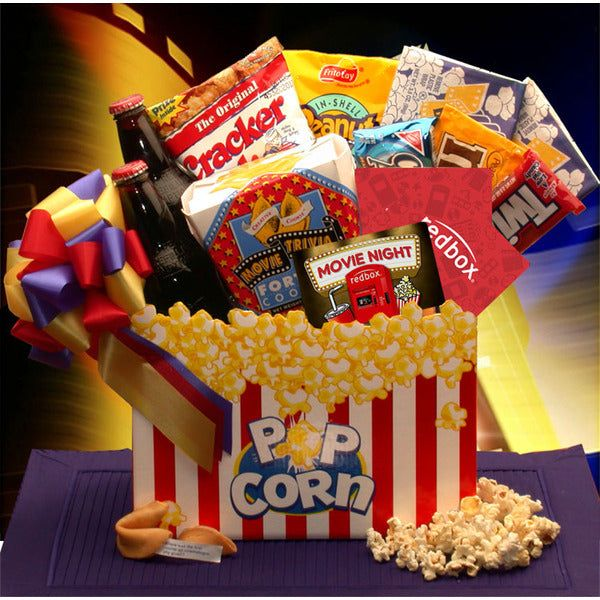

## Final Project Submission


* Student name: Nahum Odemba 
* Student pace: Full Time
* Scheduled project review date/time: 27-August-2022
* Institution: Moringa School
* Instructor name: Antony Muiko 


# FILM INDUSTRY ANALYSIS

## Data Preparation

In [113]:
#First I will import all the necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


#### The cell below reads the `.csv`  and  `.db` files using the imported libraries

In [114]:
#This step is to load datasets from the computer to our jupyter notebook
budget_df = pd.read_csv("tn.movie_budgets.csv", index_col = 0)
imdb = sqlite3.connect('im.db')


### Checking the Contenst of our Data

#### The cell below checks the first five rows of the `budget_df` file

In [115]:
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [116]:
budget_df.shape

(5782, 5)

### Select Table Names
#### In the cell below we check the names of the tables in our `IMDB` database using pd.read_sql

In [117]:
pd.read_sql("""SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';""", imdb)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


#### In the cell below we check the contents of `movie_basics` table pd.read_sql

In [118]:
pd.read_sql("""SELECT * FROM  movie_basics""", imdb)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


#### In the cell below we check the contents of `movie_ratings` table pd.read_sql

In [119]:
first_query = pd.read_sql("""SELECT * FROM movie_ratings
                             JOIN movie_basics
                             USING(movie_id)
                             WHERE numvotes > 200
                             AND averagerating > 9""", imdb)
first_query.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt9680166,9.6,624,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy
1,tt7738784,9.4,9629,Peranbu,Peranbu,2018,147.0,Drama
2,tt8203706,9.4,500,American Deep State,American Deep State,2019,62.0,Documentary
3,tt6487784,9.2,227,Generation Freedom,Generation Freedom,2019,98.0,Documentary
4,tt5813916,9.3,100568,The Mountain II,Dag II,2016,135.0,"Action,Drama,War"


## 1. Answering the first Business Question
### =>Which movie genres have the highest rating and votes?

#### The `imdb` and  dataset will be used to answer this question
#### But I will have to join the `movie_basics` and `movie_ratings` tables to solve this problem

### Joining the tables

#### In the cell below we join `movie_basics` table  with `movie_ratings` using a shared column

In [120]:
basics_ratings = pd.read_sql("""SELECT * FROM movie_basics
                                 JOIN movie_ratings
                                 USING(movie_id)""", imdb)
basics_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


### Data Cleaning

In [121]:
#I will start with checking if there is any duplicated movies
basics_ratings['primary_title'].duplicated().sum()

3863

In [122]:
#drop duplicated values
basics_ratings_no_duplicates = basics_ratings.drop_duplicates(subset=['primary_title'])
basics_ratings_no_duplicates.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [123]:
#confirming no duplicates left
basics_ratings_no_duplicates['primary_title'].duplicated().sum()

0

In [124]:
#The second step is to clean the budget_df by changing the data types
#Let us start by checking the budget datatypes
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [125]:
#The production_budget, worldwide_gross, and domestic_gross are object types
#We have to change them to int type
budget_df['production_budget'] = budget_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)
budget_df.head()

/var/folders/s4/cfrykp010nq4sqgy7zxlrj5w0000gn/T/ipykernel_1436/455337667.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budget_df['production_budget'] = budget_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
/var/folders/s4/cfrykp010nq4sqgy7zxlrj5w0000gn/T/ipykernel_1436/455337667.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
/var/folders/s4/cfrykp010nq4sqgy7zxlrj5w0000gn/T/ipykernel_1436/455337667.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single characte

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [126]:
#Filtering basics_ratings_no_duplicates further to have only 
#movies with numvotes more than 100 and rating above 6

filtered1 = basics_ratings_no_duplicates[basics_ratings_no_duplicates['averagerating'] > 6 ]
filtered2 = filtered1[filtered1['numvotes'] > 100]
filtered2



,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
10,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
...,...,...,...,...,...,...,...,...
73840,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,8.7,218
73841,tt9905412,Ottam,Ottam,2019,120.0,Drama,8.1,505
73842,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365


In [127]:
#inner join will ensure we keep columns in all the joined dataframes
joined_df= filtered2.join(budget_df, how ="inner")
joined_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,"Nov 22, 2017",Coco,175000000,209726015,798008101
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,"Nov 21, 2012",Rise of the Guardians,145000000,103412758,306900902
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,"Jun 23, 2010",Knight and Day,117000000,76423035,258751370
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,"Apr 18, 2014",Transcendence,100000000,23022309,103039258


## Exploratory Data Analysis
### In the cell below we will plot a bar plot to show the relationship between movie genres and numvotes

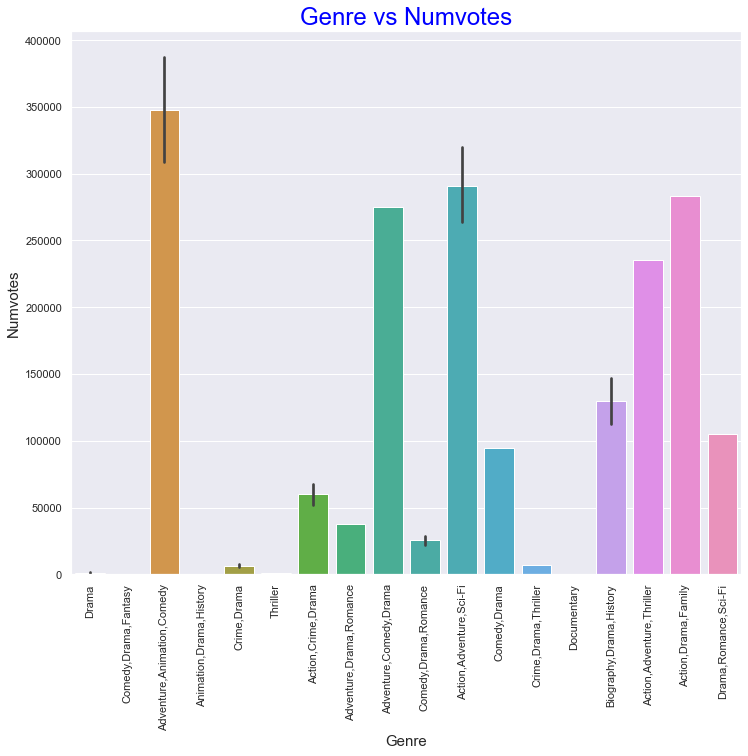

In [136]:
sns.set(rc = {'figure.figsize': (12,10)} )
ay = sns.barplot(x = 'genres', y = 'numvotes', data = joined_df)
plt.title('Genre vs Numvotes', size = 24, color = 'blue')
ay.set_ylabel('Numvotes', size = 15)
ay.set_xlabel('Genre', size = 15)
plt.xticks(rotation = 90)
plt.savefig("Movie genre vs Numvotes.png", dpi = 80);

## Analysis
### The following movie genres have high ratings and number of votes
####   1.Adventure, Animation, Comedy
####   2. Action, Adventure, Sci-Fi
####   3. Action, Drama, Family

## 2. Answering the Second Question
### Does High Production Cost Translate to High Income?
#### To answer this question, we have to plot a scatter plot to show the relationship between `production_budget` and `worldwide_gross`

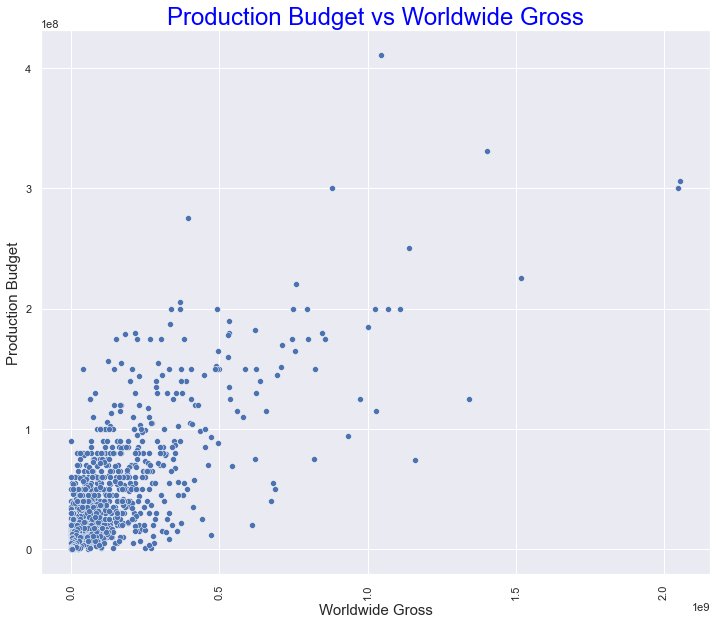

In [129]:
sns.set(rc = {'figure.figsize': (12,10)} )
ay = sns.scatterplot(x = 'worldwide_gross', y = 'production_budget', data = joined_df)
plt.xticks(rotation = 90)
plt.title('Production Budget vs Worldwide Gross', size = 24, color = 'blue')
ay.set_ylabel('Production Budget', size = 15)
ay.set_xlabel('Worldwide Gross', size = 15)
plt.savefig("Production Budget vs Worldwide Gross.png", dpi = 80);

#### Another scatter plot with `domestic_gross` instead of `worldwide_gross` can give further insight in this relationship

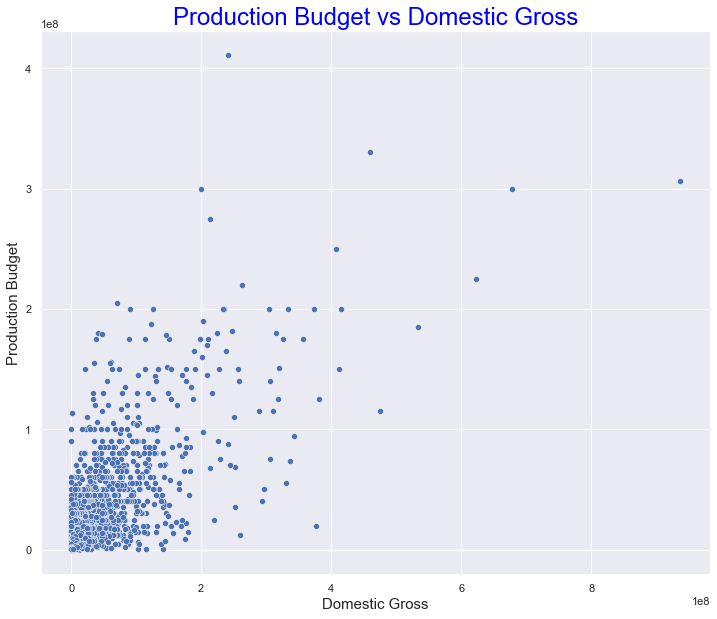

In [130]:
sns.set(rc = {'figure.figsize': (12,10)} )
ay = sns.scatterplot(x = 'domestic_gross', y = 'production_budget', data = joined_df)
plt.title('Production Budget vs Domestic Gross', size =24, color = 'blue')
ay.set_ylabel('Production Budget', size = 15)
ay.set_xlabel('Domestic Gross', size = 15)
plt.savefig("Production Budget vs Domestic Gross.png", dpi = 80);

## Analysis
### High production budget does not translate to high income

## 3. Answering the Third Question
### Does the movie genre determine its income?

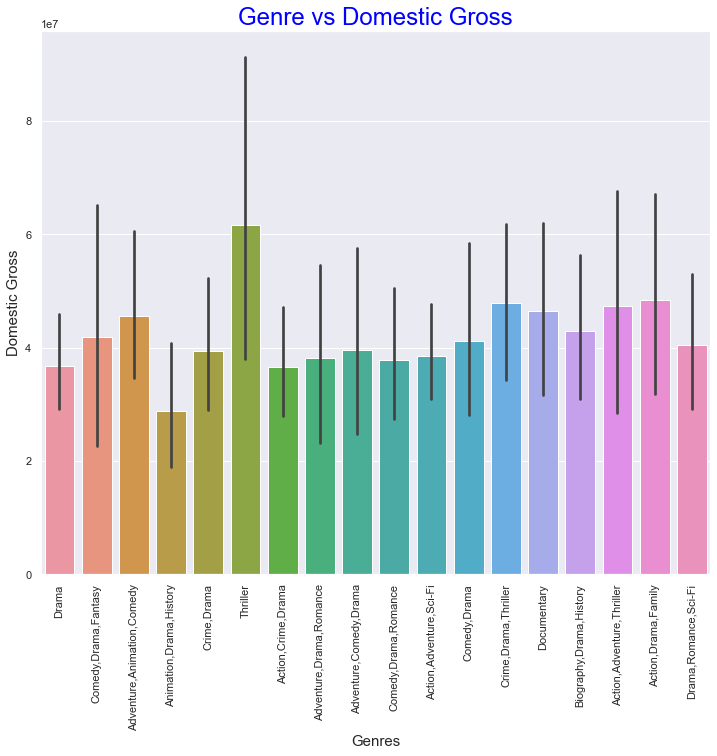

In [131]:
sns.set(rc = {'figure.figsize': (12,10)} )
ay = sns.barplot(x = 'genres', y = 'domestic_gross', data = joined_df)
plt.title('Genre vs Domestic Gross', size =24, color = 'blue')
ay.set_ylabel('Domestic Gross', size = 15)
ay.set_xlabel('Genres', size = 15)
plt.xticks(rotation = 90)
plt.savefig("Genre vs Domestic Gross.png", dpi = 80);

In [132]:
#Second we will compare the movie genre with the profit
#The profit will be calculated by substracting the production budget from worldwide gross
joined_df['Profit'] = joined_df['worldwide_gross'] - joined_df['production_budget']

In [133]:
joined_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,"Nov 22, 2017",Coco,175000000,209726015,798008101,623008101
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,"Nov 21, 2012",Rise of the Guardians,145000000,103412758,306900902,161900902
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,"Jun 23, 2010",Knight and Day,117000000,76423035,258751370,141751370
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,"Apr 18, 2014",Transcendence,100000000,23022309,103039258,3039258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,tt0443465,Before We Go,Before We Go,2014,95.0,"Comedy,Drama,Romance",6.8,45181,"Dec 31, 2013",Heli,1000000,0,552614,-447386
100,tt0443465,Before We Go,Before We Go,2014,95.0,"Comedy,Drama,Romance",6.8,45181,"Oct 11, 2013",Escape from Tomorrow,650000,171962,171962,-478038
100,tt0443465,Before We Go,Before We Go,2014,95.0,"Comedy,Drama,Romance",6.8,45181,"Jul 11, 2014",As It Is in Heaven,450000,13486,13486,-436514
100,tt0443465,Before We Go,Before We Go,2014,95.0,"Comedy,Drama,Romance",6.8,45181,"Dec 31, 2014",Horse Camp,250000,0,0,-250000


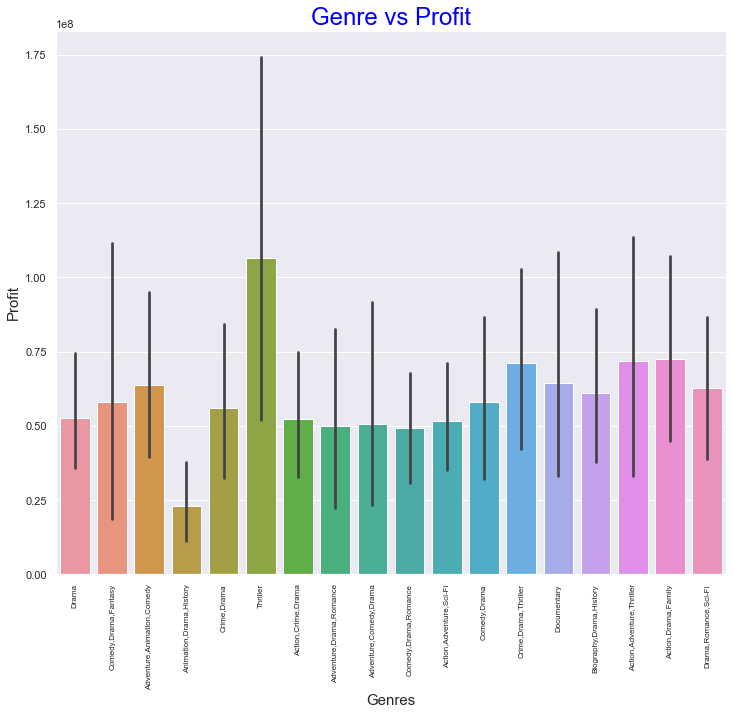

In [134]:
sns.set(rc = {'figure.figsize': (12,10)} )
ay = sns.barplot(x = 'genres', y = 'Profit', data = joined_df)
plt.title('Genre vs Profit', size =24, color = 'blue')
ay.set_ylabel('Profit', size = 15)
ay.set_xlabel('Genres', size = 15)
plt.xticks(rotation = 90, size= 8)
plt.savefig("Genre vs Profit.png", dpi = 80);
        

## Analysis
### Thriller genre makes more money followed by Action, Drama, Family, and Action, Adventure, Thriller